In [1]:
# Dataset taken from https://www.pippanorris.com/data
# Experiment proposed by Simon Rudkin, https://www.swansea.ac.uk/staff/som/academic-staff/s.t.rudkin/

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt

In [3]:
full_df = pd.read_csv('data/brexitdata', sep='\t', encoding='iso-8859-1')
print(full_df.shape)
full_df.head()

(631, 391)


,pano,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner17,Con17,Lab17,LD17,...,nore,york,east,west,eeng,wale,lond,swes,swee,pt
0,1,W07000049,Aberavon,Wales,Wales,County,Labour,17.737766,68.119514,1.800529,...,0,0,0,0,0,1,0,0,0,1
1,2,W07000058,Aberconwy,Wales,Wales,County,Conservative,44.594090,42.618974,2.926905,...,0,0,0,0,0,1,0,0,0,2
2,3,S14000001,Aberdeen North,Scotland,Scotland,Borough,Scottish National Party,22.692276,30.010610,4.605925,...,0,0,0,0,0,0,0,0,0,3
3,4,S14000002,Aberdeen South,Scotland,Scotland,Borough,Conservative,42.132470,20.549300,5.866091,...,0,0,0,0,0,0,0,0,0,4
4,5,S14000058,West Aberdeenshire and Kincardine,Scotland,Scotland,County,Conservative,47.852785,11.052785,8.641162,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# In this whole example we use the simplified socio-economical data gathering information 
# about housing, relationship, number of cars, profession, self assessed health 
# as well as the level of deprivation of the area the constituancy is located

In [5]:
subset = ['c11HouseOutright', 'c11HouseMortgage', 'c11HouseholdOnePerson', 
          'c11HouseholdMarried', 'c11CarsNone', 'c11CarsOne', 'c11CarsTwo',
          'c11NSSECLowerManager', 'c11QualNone', 'c11QualLevel4', 
          'c11HealthVeryGood', 'c11HealthGood', 'c11DeprivedNone', 'c11Deprived1']

db104 = full_df[subset].copy()

coloring_subset = ['leaveHanretty', 'lm17', 'cm17']
coloring_df = full_df[coloring_subset].copy()

## Create Ball Mapper

In [6]:
from pyBallMapper import BallMapper

In [7]:
bm = BallMapper(points = db104.values, # the pointcloud, as a numpy array
                coloring_df = coloring_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                epsilon = 18) # the radius of the balls

## Coloring

In [8]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

my_rainbow_palette = cm.get_cmap(name='viridis')

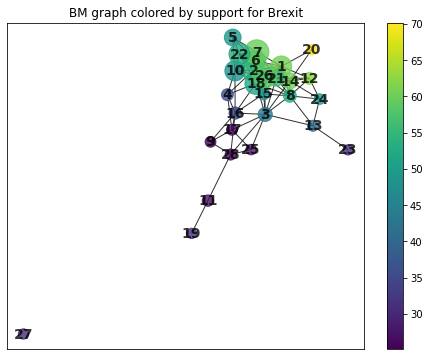

In [9]:
#In this case we color the graph by support for Brexit in 2016 referendum.
bm.color_by_variable('leaveHanretty', my_rainbow_palette)

plt.figure(figsize= (8,6))
# plot the graph
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
# there is a lot we can customize
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=5),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 font_weight= 'bold', # <------------------------------------ |
                 font_color= 'black', # <-- lot's of possible customizations |
                 font_size = 14,      # <-----------------------------------|
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
plt.colorbar(sm)
plt.title('BM graph colored by support for Brexit')
plt.show()

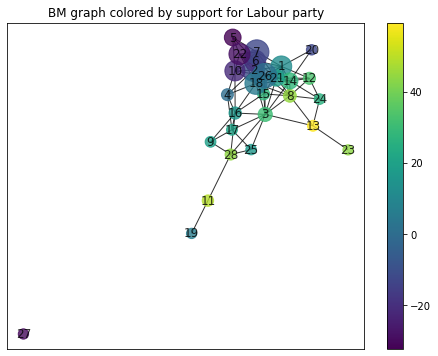

In [10]:
# In this case we color the graph by support for Labour party in 2017 election.
bm.color_by_variable('lm17', my_rainbow_palette)

plt.figure(figsize= (8,6))
# plot the graph
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
# there is a lot we can customize
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=5),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
plt.colorbar(sm)
plt.title('BM graph colored by support for Labour party')
plt.show()

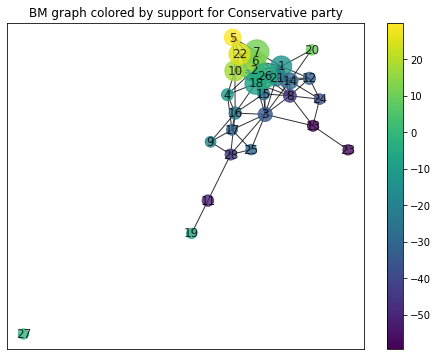

In [11]:
# In this case we color the graph by support for Conservative party in 2017 election
bm.color_by_variable('cm17', my_rainbow_palette)

plt.figure(figsize= (8,6))
# plot the graph
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=5),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
plt.colorbar(sm)
plt.title('BM graph colored by support for Conservative party')
plt.show()

In [12]:
#We may want to see why there is a node 20 so different from others supporting Tories
one = [20]
two = [6,7,10]

one_points = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in one]))

two_points = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in two]))

In [13]:
# absolute difference of the averages, divided by the average in the whole dataset
(abs(db104.iloc[one_points].mean() - db104.iloc[two_points].mean()) / db104.mean()).sort_values(ascending=False)

c11QualNone              0.583697
c11QualLevel4            0.469165
c11DeprivedNone          0.357439
c11CarsTwo               0.334543
c11CarsNone              0.324424
c11NSSECLowerManager     0.304098
c11HouseMortgage         0.225074
c11HouseholdMarried      0.183167
c11HealthVeryGood        0.172572
c11HouseOutright         0.153990
c11HouseholdOnePerson    0.101489
c11CarsOne               0.059452
c11Deprived1             0.051693
c11HealthGood            0.001867
dtype: float64

In [14]:
# We see that the coordinates 9, 10 and 13 makes much difference. To find out what
# They are, we should look at the list of variables:
# 1 - dt1$c11HouseOutright,
# 2 - dt1$c11HouseMortgage,
# 3 - dt1$c11HouseholdOnePerson,
# 4 - dt1$c11HouseholdMarried,
# 5 - dt1$c11CarsNone,
# 6 - dt1$c11CarsOne,
# 7 - dt1$c11CarsTwo,
# 8 - dt1$c11NSSECLowerManager,
# 9 - dt1$c11QualNone,
# 10 - dt1$c11QualLevel4,
# 11 - dt1$c11HealthVeryGood,
# 12 - dt1$c11HealthGood,
# 13 - dt1$c11DeprivedNone,
# 14 - dt1$c11Deprived1
# Therefore we have no (9) or lowest (10) level of qualification and deprivation
# of the area. One can bring this analysis forward, and find the regions responsible
# for that, but we will not do it here.